## IMDB exploratory data analysis

In [1]:
# Подгружаем библиотеки
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
# Загрузим данные рейтингов фильмов с известного сайта imdb.com
imdb_data = pd.read_csv('input/movie_metadata.csv')
imdb_data.head(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


Посмотрим в каком формате представлены наши данные:

In [3]:
imdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [4]:
imdb_data.shape

(5043, 28)

### Давайте выясним топ 10 самых прибыльных фильмов.


Профит - разница между кассовыми сборами и бюджетом фильма

In [5]:
imdb_data['profit'] = imdb_data['gross'] - imdb_data['budget']

In [6]:
imdb_data.drop(['gross', 'budget'], axis=1, inplace=True)

In [7]:
# Выберем необходимые столбцы
data = imdb_data.loc[:,['genres','movie_title','language','title_year','imdb_score','duration','profit']]

In [8]:
data.shape

(5043, 7)

Получаем 5043 строки

In [9]:
data.movie_title.nunique()

4917

А количество уникальных названий фильмов - 4917.

Поскольку некоторые фильмы встречаются в выборке несколько раз - сгруппируем по названию фильма и аггрегируем чистую прибыль.

In [10]:
profit_by_films = data.groupby('movie_title', as_index=False)\
        .agg({'profit': 'sum'}).sort_values('profit', ascending=False)
profit_by_films.head(10)

,movie_title,profit
3533,The Avengers,806559094.0
396,Avatar,523505847.0
1984,Jurassic World,502177271.0
4525,Titanic,458672302.0
3324,Star Wars: Episode IV - A New Hope,449935665.0
1152,E.T. the Extra-Terrestrial,424449459.0
4022,The Lion King,377783777.0
3961,The Jungle Book,375290282.0
3321,Star Wars: Episode I - The Phantom Menace,359544677.0
3706,The Dark Knight,348316061.0


Получили топ10 фильмов по величине чистой прибыли, но эти суммы слишком большие и трудночитаемые, поэтому преобразуем данные, разделив на миллион.

In [11]:
profit_by_films['profit_million'] = profit_by_films['profit']/1000000
profit_by_films.drop(['profit'], axis=1, inplace=True)

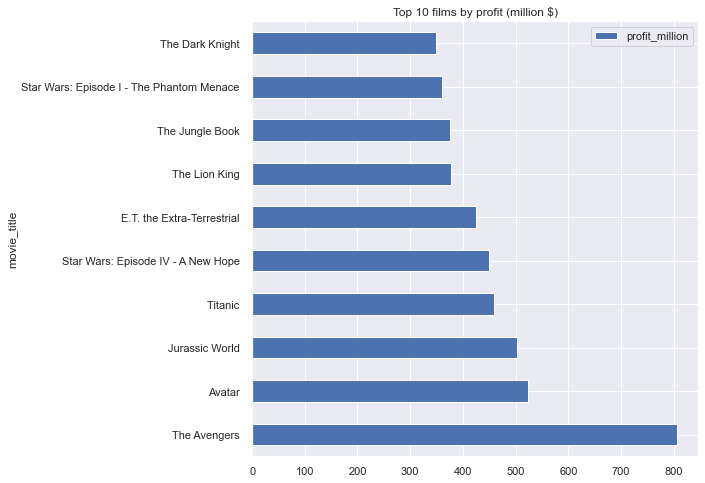

In [12]:
profit_by_films[['movie_title','profit_million']].head(10).plot\
.barh(x = 'movie_title', stacked=True, title = 'Top 10 films by profit (million $)', figsize=(8, 8));

Таким образом топ10 фильмов по прибыли представлены выше, причем прибыль первого в 2 раза больше десятого.

### Найдем 5 самых долгих фильмов за всю историю.

In [13]:
movie_duration = data[['movie_title', 'duration']].sort_values('duration', ascending=False).head(5)

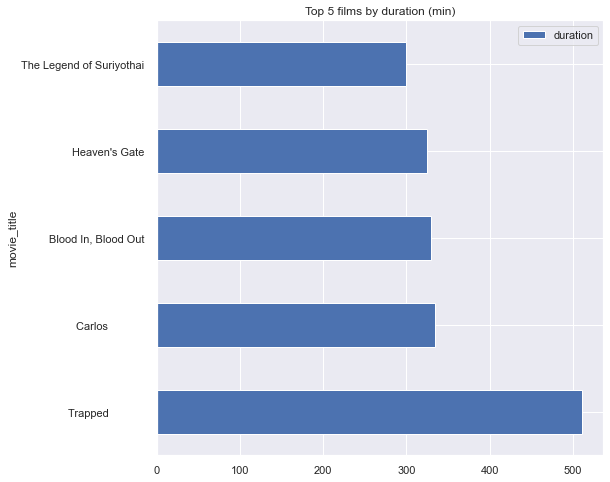

In [14]:
movie_duration[['movie_title','duration']].plot\
.barh(x = 'movie_title', stacked=True, title = 'Top 5 films by duration (min)', figsize=(8, 8));

Топ 5 фильмов по продолжительности представлены выше. Наибольшая продолжительность - 500 минут. Сложно представить человека, который сможет посмотреть весь фильм целиком, особенно в кинотеатре.

### Посмотрим какой режиссер снял больше всего фильмов.


In [15]:
most_films_by_director = imdb_data.groupby('director_name', as_index=False)\
                        .agg({'movie_title': 'count'})\
                        .rename(columns={'movie_title': 'movie_count'})\
                        .sort_values('movie_count', ascending=False)\
                        .head(5)
most_films_by_director

,director_name,movie_count
2157,Steven Spielberg,26
2376,Woody Allen,22
391,Clint Eastwood,20
1477,Martin Scorsese,20
1901,Ridley Scott,17


Стивен Спилберг снял за свою жизнь 26 фильмов. А топ5 режиссеров по количеству фильмов совсем не кажется неожиданным, думаю, этих режиссеров знает весь мир.

### Давайте посмотрим какие русские фильмы оказались в рейтинге IMDB. Какой жанр встречается чаще всего.

In [16]:
ru_movies = imdb_data.loc[:,['country', 'movie_title', 'imdb_score', 'genres', 'profit']] \
    .query("country == 'Russia'")
ru_movies

,country,movie_title,imdb_score,genres,profit
1382,Russia,Obitaemyy ostrov,5.3,Action|Adventure|Sci-Fi,NaN
1731,Russia,A Warrior's Tail,4.1,Adventure|Animation|Fantasy,NaN
1878,Russia,Viy,5.4,Adventure|Fantasy|Mystery|Thriller,NaN
2010,Russia,Space Dogs,5.2,Adventure|Animation|Comedy|Family,NaN
2305,Russia,Machete Kills,5.6,Action|Comedy|Crime|Thriller,-12731341.0
2451,Russia,Mongol: The Rise of Genghis Khan,7.3,Adventure|Biography|Drama|History|War,-14298357.0
2739,Russia,The Return,8.0,Drama|Mystery|Thriller,NaN
3532,Russia,Hard to Be a God,6.7,Drama|Sci-Fi,NaN
3538,Russia,Snow Queen,5.3,Adventure|Animation|Family,NaN
3883,Russia,Night Watch,6.5,Fantasy|Thriller,-2712523.0


Все представленные русские фильмы имеются в рейтинге IMDB, также можно сделать вывод, что на большество русских фильмов не указаны сборы, а все остальные - убыточны.

In [17]:
ru_movies.sort_values('profit')

,country,movie_title,imdb_score,genres,profit
2451,Russia,Mongol: The Rise of Genghis Khan,7.3,Adventure|Biography|Drama|History|War,-14298357.0
2305,Russia,Machete Kills,5.6,Action|Comedy|Crime|Thriller,-12731341.0
3883,Russia,Night Watch,6.5,Fantasy|Thriller,-2712523.0
1382,Russia,Obitaemyy ostrov,5.3,Action|Adventure|Sci-Fi,NaN
1731,Russia,A Warrior's Tail,4.1,Adventure|Animation|Fantasy,NaN
1878,Russia,Viy,5.4,Adventure|Fantasy|Mystery|Thriller,NaN
2010,Russia,Space Dogs,5.2,Adventure|Animation|Comedy|Family,NaN
2739,Russia,The Return,8.0,Drama|Mystery|Thriller,NaN
3532,Russia,Hard to Be a God,6.7,Drama|Sci-Fi,NaN
3538,Russia,Snow Queen,5.3,Adventure|Animation|Family,NaN


Таким образом наименее убыточный русский фильм, по представленным данным, - Night Watch.

In [18]:
ru_movies_genres = ru_movies[['movie_title', 'genres']]

Поскольку все жанры фильма представлены в одной колонке, необходимо их разделить.

In [19]:
s = ru_movies_genres.genres.str.split('|').apply(Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'genres'
del ru_movies_genres['genres']
ru_movies_genres_split = ru_movies_genres.join(s)

Сгруппируем данные по жанру, посчитаем колическотво уникальных жанров, затем отсортируем по убыванию.

In [20]:
ru_popular_genres = (pd.DataFrame(ru_movies_genres_split.groupby('genres').movie_title.nunique())).sort_values('movie_title', ascending=False )

In [21]:
ru_popular_genres.head(5)

,movie_title
genres,
Adventure,7
Drama,4
Thriller,4
Animation,3
Fantasy,3


Самым популярным жанром в российском кино является - приключения.

### Найдем самый старый черно-белый фильм.

In [22]:
imdb_data.color.unique()

array(['Color', nan, ' Black and White'], dtype=object)

Посмотрим какое количество черно-белых фильмов относительно цветных:

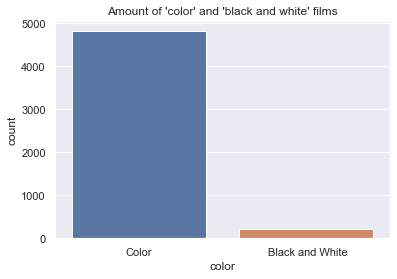

In [23]:
plt.title("Amount of 'color' and 'black and white' films")
sns.countplot(x = 'color', data = imdb_data)

Отберем черно-белые фильмы:

In [24]:
uncolor_movies = imdb_data[imdb_data.color == ' Black and White']

In [25]:
uncolor_movies[['movie_title', 'title_year']].sort_values('title_year').head()

,movie_title,title_year
4810,Intolerance: Love's Struggle Throughout the Ages,1916.0
4958,Over the Hill to the Poorhouse,1920.0
4885,The Big Parade,1925.0
2734,Metropolis,1927.0
4664,Pandora's Box,1929.0


Самый старый черно-белый фильм - Intolerance: Love's Struggle Throughout the Ages.

### Найдем страны, фильмы которых отображены в наибольшем количестве в этой статистике. 

Сгруппируем фильмы по стране, затем сагрегируем по количеству встречающихся фильмов и отсортеруем в порядке убывания.

In [26]:
film_production_by_countries = imdb_data.groupby('country')\
                .agg({'movie_title': 'count'})\
                .rename(columns={'movie_title': 'movie_production'})\
                .sort_values('movie_production', ascending=False)

In [27]:
film_production_by_countries.head(10)

,movie_production
country,
USA,3807
UK,448
France,154
Canada,126
Germany,97
Australia,55
India,34
Spain,33
China,30


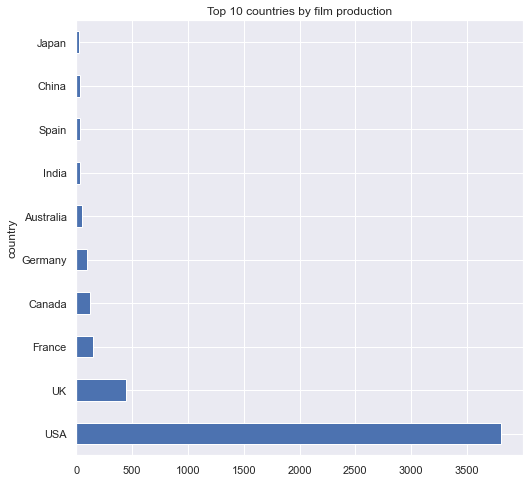

In [28]:
film_production_by_countries.movie_production.head(10).plot\
.barh(x = 'movie_production', stacked=True, title = 'Top 10 countries by film production', figsize=(8, 8));

Большенство фильмов в данной выборке - производства США, на втором месте - Великобритания.

### Выясним кто же самый популярный актер в мире.

В данной выборке выяснить это можно лишь по количеству лайков актера в facebook. Поскольку бывают роли разного "плана" - необходимо учесть все.

In [29]:
fb_actor_1_likes = imdb_data.groupby('actor_1_name', as_index=False)\
            .agg({'actor_1_facebook_likes': 'sum'})\
            .rename(columns={'actor_1_name': 'actor_name'})\
            .sort_values('actor_1_facebook_likes', ascending=False)

In [30]:
fb_actor_1_likes.head(10)

,actor_name,actor_1_facebook_likes
976,Johnny Depp,1640000.0
1681,Robin Williams,1323000.0
1667,Robert De Niro,1078000.0
1324,Matthew Ziff,780000.0
782,J.K. Simmons,744000.0
917,Jimmy Bennett,696000.0
849,Jason Statham,676000.0
433,Darcy Donavan,640000.0
1178,Leonardo DiCaprio,609000.0
1718,Ryan Gosling,561000.0


In [31]:
fb_actor_2_likes = imdb_data.groupby('actor_2_name', as_index=False)\
            .agg({'actor_2_facebook_likes': 'sum'})\
            .rename(columns={'actor_2_name': 'actor_name'})\
            .sort_values('actor_2_facebook_likes', ascending=False)

In [32]:
fb_actor_2_likes.head(10)

,actor_name,actor_2_facebook_likes
2104,Morgan Freeman,220000.0
350,Brad Pitt,154000.0
155,Andrew Fiscella,137000.0
486,Charlize Theron,135000.0
1226,James Franco,121000.0
1999,Meryl Streep,121000.0
411,Bruce Willis,117000.0
532,Christian Bale,115000.0
1553,Kate Winslet,112000.0
2437,Robert De Niro,110000.0


In [33]:
fb_actor_3_likes = imdb_data.groupby('actor_3_name', as_index=False)\
            .agg({'actor_3_facebook_likes': 'sum'})\
            .rename(columns={'actor_3_name': 'actor_name'})\
            .sort_values('actor_3_facebook_likes', ascending=False)

In [34]:
fb_actor_3_likes.head(10)

,actor_name,actor_3_facebook_likes
215,Anne Hathaway,77000.0
3013,Scarlett Johansson,76000.0
1173,Gary Oldman,50000.0
1763,Joseph Gordon-Levitt,46000.0
390,Bradley Cooper,42000.0
3151,Steve Carell,42000.0
211,Anna Kendrick,40000.0
3216,Taylor Lautner,36000.0
1443,James Franco,33000.0
2291,Matthew McConaughey,33000.0


После того, как мы получили количество лайков актеров за роль каждого плана, необходимо их "склеить".

In [35]:
fb_actor_likes = fb_actor_1_likes.merge(fb_actor_2_likes, on='actor_name')\
                                 .merge(fb_actor_3_likes, on='actor_name')

In [36]:
fb_actor_likes.head(10)

,actor_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes
0,Hugh Jackman,420000.0,40000.0,20000.0
1,Scarlett Johansson,418000.0,76000.0,76000.0
2,Matt Damon,390000.0,91000.0,13000.0
3,Bruce Willis,390000.0,117000.0,13000.0
4,Bill Murray,338000.0,78000.0,26000.0
5,Steve Buscemi,324000.0,108000.0,12000.0
6,Harrison Ford,297000.0,11000.0,11000.0
7,Morgan Freeman,275000.0,220000.0,22000.0
8,Ryan Reynolds,256000.0,32000.0,16000.0
9,Anthony Hopkins,252000.0,84000.0,24000.0


Просуммируем количество лайков актеров за все их роли.

In [37]:
fb_actor_likes['actor_facebook_likes'] = fb_actor_likes['actor_1_facebook_likes'] + \
fb_actor_likes['actor_2_facebook_likes'] + fb_actor_likes['actor_3_facebook_likes']

Отсортируем в порядке убыванию по количеству лайков на фейсбук.

In [38]:
fb_likes = fb_actor_likes[['actor_name', 'actor_facebook_likes']]\
            .sort_values('actor_facebook_likes', ascending=False)\
            .set_index('actor_name').head(10)

Таким образом самой популярной актрисой по лайкам на facebook'е является Scarlett Johansson.

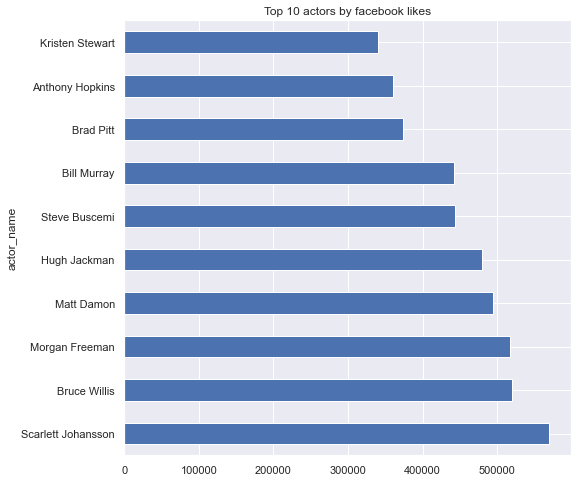

In [39]:
fb_likes.actor_facebook_likes.head(10).plot\
.barh(x = 'actor_facebook_likes', stacked=True, title = 'Top 10 actors by facebook likes', figsize=(8, 8));